<a href="https://colab.research.google.com/github/karthik0311/Machine-Learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Regression with Neural Networks in TensorFlow Tutorial
There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).
In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

In [1]:
# import tensor flow

import tensorflow as tf
print(tf.__version__)

2.4.1


### Creating data to view and fit

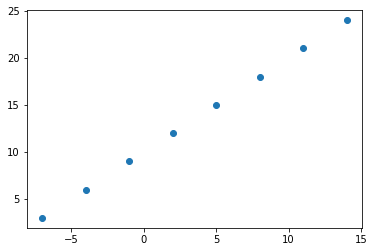

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

### Input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [4]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedrrom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrrom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

Our goal here will be to use X to predict y.

So our input will be X and our output will be y.

Knowing this, what do you think our input and output shapes will be?



In [5]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

In [7]:
# turn our numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

### Steps in modelling
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

https://www.tensorflow.org/api_docs/python/tf/keras/Sequential 

Loss Function : We use a loss function to determine how far the predicted values deviate from the actual values in the training data. We change the model weights to make the loss minimum, and that is what training is all about

https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [11]:
# set random seed
tf.random.set_seed(42)
# 1. create a model using sequential PI

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 294ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
# Try and make a prediction using our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [13]:
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

### Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3.  **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).
Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(X,  Y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 481ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 7

In [16]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model (with extra hidden layers with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(X,  Y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 381ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8279 - mae: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1425 - mae: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4485 - mae: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7427 - mae: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0218 - mae: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2826 - mae: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5221 - mae: 7.5221
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.7841 - mae: 6.7841
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - 

In [23]:
model.predict([17.0])

array([[27.216782]], dtype=float32)